In [2]:
import os

import geopandas as gpd
import pandas as pd
import seaborn as sns
import cmcrameri.cm as cmc
from cmcrameri import show_cmaps

In [3]:
color_sheet = pd.read_excel('CGMW_ICS_colour_codes.xlsx',skiprows=9)
header = pd.read_excel('CGMW_ICS_colour_codes.xlsx',header=5).columns
color_sheet.columns = header

color_dict = dict(zip(color_sheet['Long List (formatted)'],color_sheet['HTML RGB HASH']))
color_dict[None] = '#FFFFFF'
print(color_dict)

{'Upper/Late Holocene': '#FDEDEC', 'Northgrippian': '#FDECE4', 'Middle Holocene': '#FDECE4', 'Greenlandian': '#FEECDB', 'Lower/Early Holocene': '#FEECDB', 'Holocene': '#FEEBD2', 'Upper Pleistocene': '#FFF2D3', 'Upper/Late Pleistocene': '#FFF2D3', 'Chibanian': '#FFF2C7', 'Middle Pleistocene': '#FFF2C7', 'Calabrian': '#FFF2BA', 'Gelasian': '#FFEDB3', 'Lower/Early Pleistocene': '#FFF0B9', 'Pleistocene': '#FFEFAF', 'Quaternary': '#F9F97F', 'Piacenzian': '#FFFFBF', 'Upper/Late Pliocene': '#FFF2CD', 'Zanclean': '#FFFFB3', 'Lower/Early Pliocene': '#FFF2C3', 'Pliocene': '#FFFF99', 'Messinian': '#FFFF73', 'Tortonian': '#FFFF66', 'Upper/Late Miocene': '#FFEC8C', 'Serravallian': '#FFFF59', 'Langhian': '#FFFF4D', 'Middle Miocene': '#FFEC73', 'Burdigalian': '#FFFF41', 'Aquitanian': '#FFFF33', 'Lower/Early Miocene': '#FFEC55', 'Miocene': '#FFFF00', 'Neogene': '#FFE619', 'Chattian': '#FEE6AA', 'Rupelian': '#FED99A', 'Oligocene': '#FEC07A', 'Priabonian': '#FDCDA1', 'Bartonian': '#FDC091', 'Lutetian': 

In [4]:
# Read files
A_layers = ['Polygons-K-38-37-A','Polygonz4-K-38-25-V','Polygonz4-K3813','Polygonz4K-38-35-G','Polygonz4K-38-38-G']
B_layer = 'Polygonz4-K-38-V-G'

maps = []
for name in A_layers:
    layer = gpd.read_file('../digitized_maps/SovietDigitizing_041124_A.gpkg',layer=name)
    maps.append(layer)

B = gpd.read_file('../digitized_maps/SovietDigitizing_041124_B.gpkg',layer=B_layer)
maps.append(B)

map_names = ['K-38-38-A','K-38-25-V','K3813','K-38-35-G','K-38-38-G','K-38-38-V']

In [5]:
all_units = pd.Series()
for map in maps:
    map.rename(columns={'units':'unit'},inplace=True)
    map_units = pd.Series(map.unit.unique())
    all_units = pd.concat([all_units,map_units])

unique_units = all_units.unique()
unique_units.sort()

print(unique_units)
print(len(unique_units))

unit_dict={}

['C11kz' 'C2-Tch' 'C21-Tch' 'C3kupsilon1' 'Cr1' 'Cr1ap+al' 'Cr1b' 'Cr1v+h'
 'Cr2' 'Cr2cm' 'Cr2t-d' 'D2+3kr' 'Enk' 'Ice' 'J' 'J11mr1' 'J11mr2'
 'J21mr2' 'J21ms1' 'J21ms11' 'J21ms2' 'J21ms21' 'J2S2' 'J2bj' 'J2bt'
 'J2ch3' 'J2hd1' 'J2hd2' 'J2hd3' 'J2hd4' 'J2s2' 'J2tl1' 'J2tl2' 'J31'
 'J31s' 'J31s1' 'J3cupsilon' 'J3km' 'K1b' 'K1brdashh' 'N1m' 'N1s' 'N1s1+2'
 'N21' 'N2gr' 'N2pn' 'O-S1dl' 'Pg1+Pg1+22' 'Pg2(1)2' 'Pg2(2+3)2' 'Pg3+N11'
 'Pg32' 'Q' 'S2-D1+2lh' 'S2-D1bl' 'betaCr2t' 'betaJ2' 'betaTr' 'betamuJ2'
 'cJ2bt' 'deltaJ2' 'gamma1C21-C2' 'gamma2C21-C2' 'gammaD3-C11' 'gammaJ2'
 'gammadeltaJ2' 'muthetaTr' 'pC21-C2' 'phiupsilonJ2' 'qdeltaJ2'
 'qdeltamuJ2' 'upsilionbetaJ2']
72


/tmp/ipykernel_736/1462694016.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  all_units = pd.Series()


#009270
['#222725', '#1a4238', '#115d4b', '#08785d', '#009270']


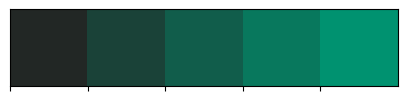

In [6]:
# Ordovician
base = color_dict['Ordovician']
print(base)

colors = sns.dark_palette(base,n_colors=5).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'O-S1dl':colors[2]})

#B3E1B6
['#252625', '#485549', '#6c846e', '#90b392', '#b3e1b6']


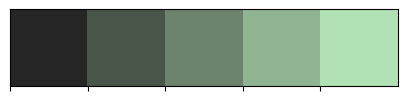

In [7]:
# Silurian
base = color_dict['Silurian']
print(base)

colors = sns.dark_palette(base,n_colors=5).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'S2-D1+2lh':colors[1],'S2-D1bl':colors[2]})


#CB8C37
['#292522', '#513f28', '#7a592d', '#a37332', '#cb8c37']


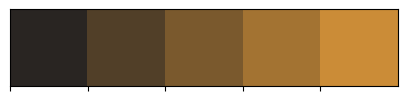

In [8]:
# Devonian
base = color_dict['Devonian']
print(base)

colors = sns.dark_palette(base,n_colors=5).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'D2+3kr':colors[2]})

#67A599
['#242626', '#354643', '#466660', '#56867c', '#67a599']


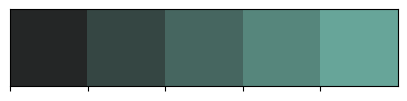

In [9]:
# Carboniferous
base = color_dict['Carboniferous']
print(base)

colors = sns.dark_palette(base,n_colors=5).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'C11kz':colors[1],'C2-Tch':colors[2],'C21-Tch':colors[2],'C3kupsilon1':colors[4]})

#42AED0
['#232628', '#273940', '#2c4d58', '#306070', '#357488', '#3987a0', '#3e9bb8', '#42aed0']


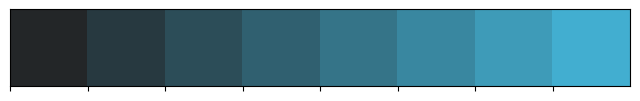

In [10]:
# Early Jurassic
base = color_dict['Lower Jurassic']
print(base)

colors = sns.dark_palette(base,n_colors=8).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'J11mr1':colors[1], 'J11mr2':colors[2],
 'J21mr2':colors[3], 'J21ms1':colors[4], 'J21ms11':colors[5], 'J21ms2':colors[6], 'J21ms21':colors[7]}) 


#80CFD8
['#242626', '#2c3537', '#344547', '#3d5457', '#456467', '#4e7377', '#568287', '#5e9197', '#67a1a8', '#6fb1b8', '#78c0c8', '#80cfd8']


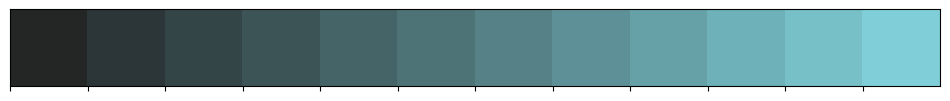

In [14]:
# Middle Jurassic
base = color_dict['Middle Jurassic']
print(base)

colors = sns.dark_palette(base,n_colors=12).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'J2S2':colors[1],'J2bj':colors[3],'J2bt':colors[4],
 'J2ch3':colors[5],'J2hd1':colors[6],'J2hd2':colors[7],'J2hd3':colors[8],'J2hd4':colors[9],'J2s2':colors[1],'J2tl1':colors[10],'J2tl2':colors[11]})  



#B3E3EE
['#242627', '#414c4e', '#5d7276', '#7a979e', '#96bdc6', '#b3e3ee']


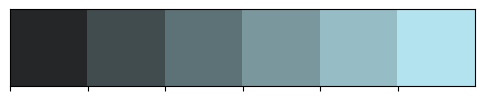

In [17]:
# Late Jurassic
base = color_dict['Upper Jurassic']
print(base)

colors = sns.dark_palette(base,n_colors=6).as_hex()
print(colors)
sns.palplot(colors)

unit_dict.update({'J31':colors[1],'J31s':colors[2],'J31s1':colors[3],'J3cupsilon':colors[4],'J3km':colors[5]})  

In [ ]:
# Cretaceous
base = color_dict['Cretaceous']
print(base)

sns.dark_palette(base,n_colors=5)

#7FC64E


[(0.13987108361173997, 0.1511502666606701, 0.1352497940608985),
 (0.22976426185789767, 0.30809340619312475, 0.17807522060339964),
 (0.3196574401040554, 0.4650365457255794, 0.2209006471459008),
 (0.409550618350213, 0.6219796852580342, 0.26372607368840195),
 (0.4980392156862745, 0.7764705882352941, 0.3058823529411765)]